In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/Users/ellen/GitHub/DeepLearningProjects/dataset/mnist.npz')

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [51]:
X_train.shape

(60000, 28, 28, 1)

In [52]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [53]:
y_train_cat.shape

(60000, 10)

In [54]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [55]:
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [56]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [58]:
h = model.fit(X_train, y_train_cat, batch_size=512,
          epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s - loss: 9.6489 - acc: 0.3955 - val_loss: 8.4354 - val_acc: 0.4740
Epoch 2/10
48000/48000 [==============================] - 24s - loss: 7.5915 - acc: 0.5247 - val_loss: 6.8019 - val_acc: 0.5740
Epoch 3/10
48000/48000 [==============================] - 24s - loss: 4.9709 - acc: 0.6838 - val_loss: 3.5890 - val_acc: 0.7692
Epoch 4/10
48000/48000 [==============================] - 23s - loss: 3.2501 - acc: 0.7893 - val_loss: 1.9588 - val_acc: 0.8649
Epoch 5/10
48000/48000 [==============================] - 23s - loss: 1.7930 - acc: 0.8779 - val_loss: 1.8582 - val_acc: 0.8726
Epoch 6/10
48000/48000 [==============================] - 23s - loss: 0.1895 - acc: 0.9752 - val_loss: 0.1071 - val_acc: 0.9775
Epoch 7/10
48000/48000 [==============================] - 26s - loss: 0.0375 - acc: 0.9910 - val_loss: 0.1044 - val_acc: 0.9785
Epoch 8/10
48000/48000 [==============================

In [59]:
model.evaluate(X_test, y_test_cat)

 9952/10000 [============================>.] - ETA: 0s

[0.12426366722899061, 0.97840000000000005]

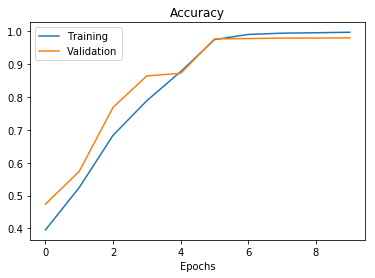

In [60]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
# plt.plot(h.history['test_acc'])

plt.legend(['Training', 'Validation','Test'])
plt.title('Accuracy')
plt.xlabel('Epochs')